# EDA on US Accidents Data for 2016-2021

###### importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### reading and storing database as a dataframe

In [2]:
df = pd.read_csv('US_Accidents_Dec21_updated.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
#checking the number of rows and columns
df.shape

(2845342, 47)

In [4]:
# checking the dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [5]:
#checking the summary statistics
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [6]:
numeric_df = df.select_dtypes(exclude=['object','bool'])
len(numeric_df.columns)

14

In [7]:
df[df.duplicated()]

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight


###### Missing values

In [8]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [9]:
percentage_of_missing=(df.isnull().sum().sort_values(ascending=False)*100)/len(df)
percentage_of_missing[percentage_of_missing>0]

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
dtype: float64

<AxesSubplot:>

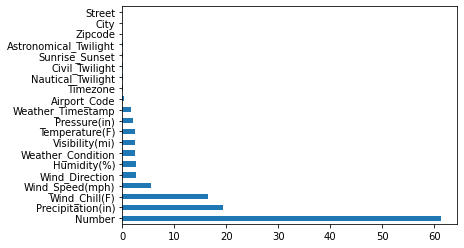

In [10]:
percentage_of_missing[percentage_of_missing>0].plot(kind='barh')

In [11]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [12]:
#dropping unwanted columns
df.drop(columns=['ID','Number'], inplace=True)

In [13]:
#filling nulls with mean
df['Precipitation(in)'].fillna(df['Precipitation(in)'].mean(), inplace=True)
df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].mean(), inplace=True)

In [14]:
#dropping all nulls
df.dropna(inplace=True)

In [15]:
missing_values=df.isnull().sum()
missing_values[missing_values>0]

Series([], dtype: int64)

###### Exploratory Analysis

In [16]:
df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [17]:
df.nunique()

Severity                       4
Start_Time               1834321
End_Time                 2208412
Start_Lat                1035577
Start_Lng                1059711
End_Lat                  1023295
End_Lng                  1045097
Distance(mi)               13687
Description              1115045
Street                    154064
Side                           2
City                       10788
County                      1668
State                         49
Zipcode                   347059
Country                        1
Timezone                       4
Airport_Code                1947
Weather_Timestamp         444273
Temperature(F)               764
Wind_Chill(F)                887
Humidity(%)                  100
Pressure(in)                1050
Visibility(mi)                68
Wind_Direction                23
Wind_Speed(mph)              132
Precipitation(in)            221
Weather_Condition            123
Amenity                        2
Bump                           2
Crossing  

###### Analysis based on City, State and Co-ordinates

C:\Users\chitr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

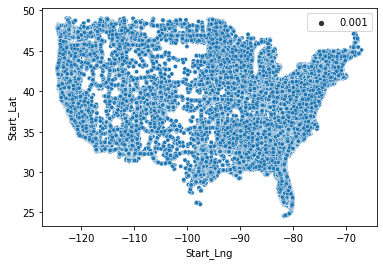

In [18]:
sns.scatterplot(df['Start_Lng'], df['Start_Lat'], size=0.001)

<AxesSubplot:>

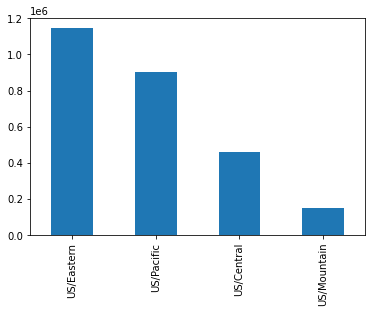

In [19]:
df['Timezone'].value_counts().plot(kind='bar')

In [20]:
#Top 50 cities in terms of percentage of accidents
((df['City'].value_counts()*100)/len(df))[:50]

Miami              3.933268
Los Angeles        2.378154
Orlando            2.025541
Dallas             1.544270
Houston            1.407291
Sacramento         1.195233
Charlotte          1.183938
San Diego          0.969094
Raleigh            0.847778
Minneapolis        0.846423
Portland           0.756622
Nashville          0.750410
Baton Rouge        0.665767
Saint Paul         0.615577
Austin             0.612791
Phoenix            0.605712
New Orleans        0.581991
Atlanta            0.543435
Jacksonville       0.542983
Richmond           0.505067
Tucson             0.503147
Riverside          0.480706
San Jose           0.474494
Bakersfield        0.446330
Kansas City        0.445351
Chicago            0.407096
San Bernardino     0.403708
Ontario            0.386613
Salt Lake City     0.383714
Hialeah            0.381304
Fort Lauderdale    0.376598
Tampa              0.374565
Anaheim            0.366884
Oakland            0.365566
Bronx              0.352915
Columbia           0

<AxesSubplot:ylabel='City'>

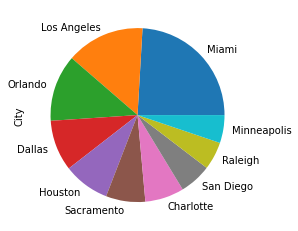

In [21]:
#Top 10 cities by occurences of accidents using pie chart
((df['City'].value_counts()*100)/len(df))[:10].plot(kind='pie')

C:\Users\chitr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='count'>

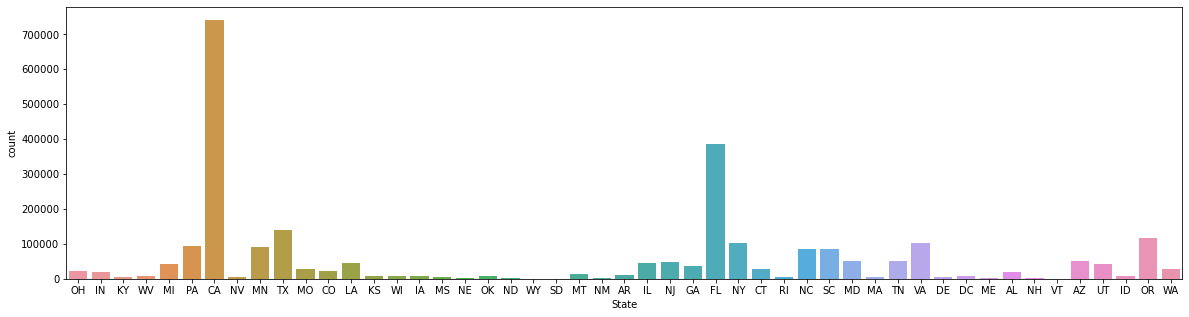

In [22]:
#Number of accidents for each state in US
plt.figure(figsize=(20,5))
sns.countplot(df['State'])

<AxesSubplot:ylabel='State'>

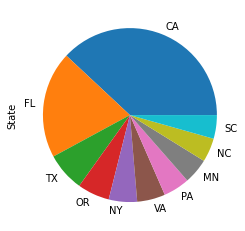

In [23]:
#Top 5 states by occurences of accidents using pie chart
((df['State'].value_counts()*100)/len(df))[:10].plot(kind='pie')

C:\Users\chitr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

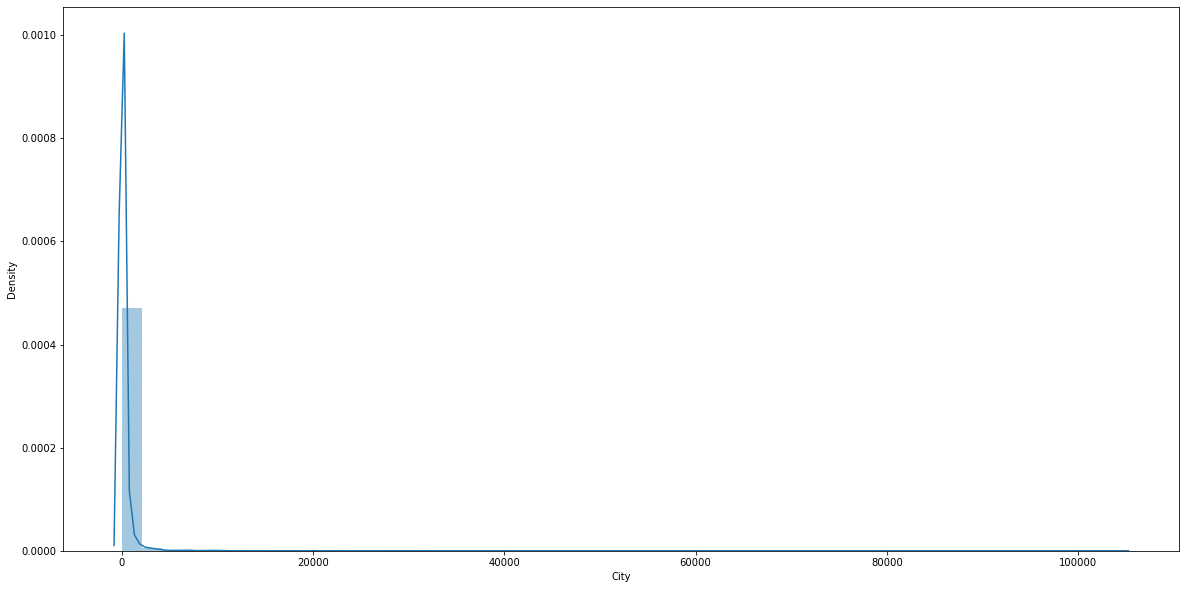

In [24]:
#Distribution of number of accidents
plt.figure(figsize=(20,10))
sns.distplot(df['City'].value_counts())

In [25]:
#Number of cities with high number of accidents
Number_of_accidents = df['City'].value_counts()
High_accident_prone_cities = Number_of_accidents[Number_of_accidents>=1000]
Low_accident_prone_cities = Number_of_accidents[Number_of_accidents<1000]

In [26]:
#Percentage of cities with high number of accidents
len(High_accident_prone_cities)*100/len(Number_of_accidents)

4.199110122358176

In [27]:
#Percentage of cities with low number of accidents
len(Low_accident_prone_cities)*100/len(Number_of_accidents)

95.80088987764182

C:\Users\chitr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

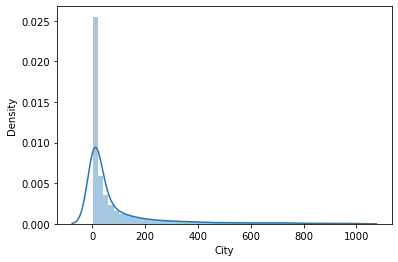

In [28]:
#Distribution plot for low accident prone cities
sns.distplot(Low_accident_prone_cities)

<AxesSubplot:xlabel='City', ylabel='Count'>

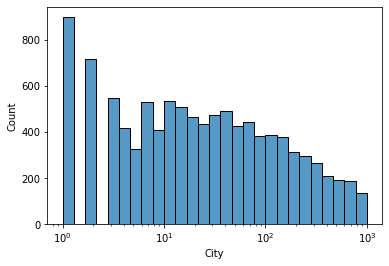

In [29]:
#Reviewing the distribution after using logarithmic scaling
sns.histplot(Low_accident_prone_cities, log_scale=True)

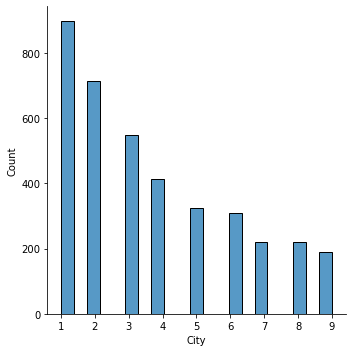

In [30]:
#Rechecking for distribution for high density of accidents at 10^0
sns.displot(Number_of_accidents[Number_of_accidents<10])

###### Analysis by Temperature and other weather conditions

In [31]:
#conversion of temperature from Fahrenheit to Celsius
df['Temperature']=(df['Temperature(F)']-32)*5/9

C:\Users\chitr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chitr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

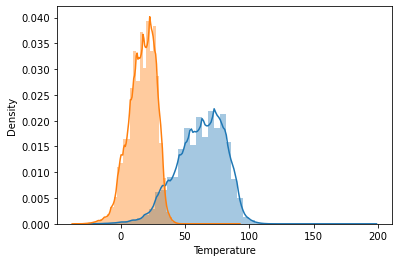

In [32]:
plt.figure()
sns.distplot(df['Temperature(F)'])
sns.distplot(df['Temperature'])

C:\Users\chitr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

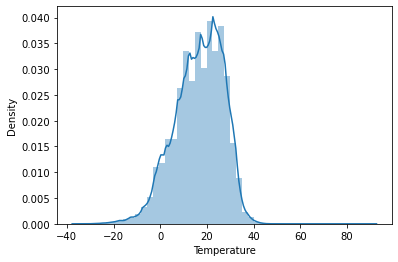

In [33]:
sns.distplot(df['Temperature'])

C:\Users\chitr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Humidity(%)', ylabel='Density'>

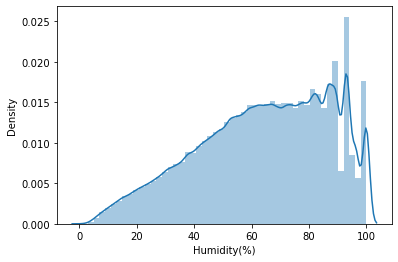

In [34]:
sns.distplot(df['Humidity(%)'])

C:\Users\chitr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wind_Speed(mph)', ylabel='Density'>

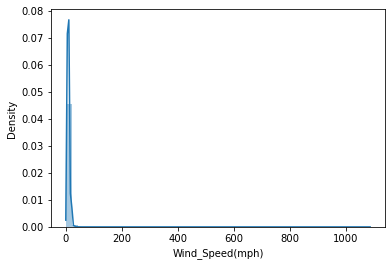

In [35]:
sns.distplot(df['Wind_Speed(mph)'])

<AxesSubplot:xlabel='Precipitation(in)', ylabel='Count'>

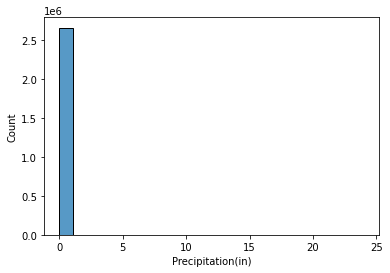

In [36]:
sns.histplot(df['Precipitation(in)'])

<AxesSubplot:>

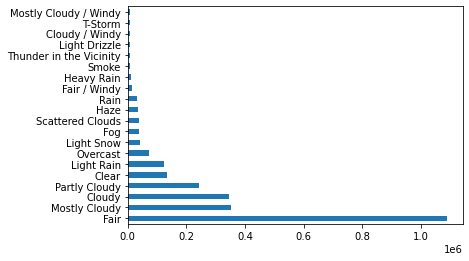

In [37]:
df['Weather_Condition'].value_counts()[:20].plot(kind='barh')

###### Analysis by Time

In [38]:
df['Start_Time'].head()

0    2016-02-08 00:37:08
4    2016-02-08 07:53:43
5    2016-02-08 08:16:57
6    2016-02-08 08:15:41
7    2016-02-08 11:51:46
Name: Start_Time, dtype: object

In [39]:
df['Start_Time'].unique()

array(['2016-02-08 00:37:08', '2016-02-08 07:53:43',
       '2016-02-08 08:16:57', ..., '2019-08-23 19:11:30',
       '2019-08-23 19:00:21', '2019-08-23 18:52:06'], dtype=object)

In [40]:
df=df[df['Start_Time']!=' ']

In [41]:
df['Start_Time']=pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S')
df['Start_Time'].head()

0   2016-02-08 00:37:08
4   2016-02-08 07:53:43
5   2016-02-08 08:16:57
6   2016-02-08 08:15:41
7   2016-02-08 11:51:46
Name: Start_Time, dtype: datetime64[ns]

In [42]:
df['End_Time']=pd.to_datetime(df['End_Time'], format='%Y-%m-%d %H:%M:%S')
df['End_Time'].head()

0   2016-02-08 06:37:08
4   2016-02-08 13:53:43
5   2016-02-08 14:16:57
6   2016-02-08 14:15:41
7   2016-02-08 17:51:46
Name: End_Time, dtype: datetime64[ns]

In [43]:
df['Year']=df['Start_Time'].dt.year
df['Year'].value_counts()

2021    1455869
2020     597318
2019     239118
2017     134330
2018     130673
2016      98575
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='Count'>

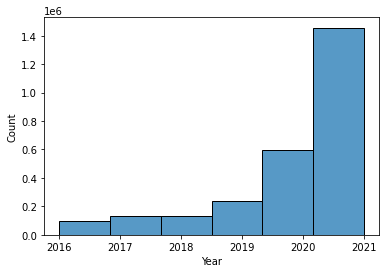

In [44]:
sns.histplot(df['Year'], bins=6)

In [45]:
#df_population= pd.read_excel('B230RC0A052NBEA.xlxs', '')

<AxesSubplot:xlabel='Start_Time', ylabel='Percent'>

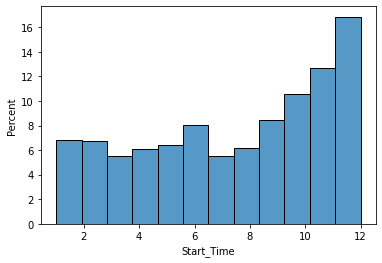

In [46]:
sns.histplot(df['Start_Time'].dt.month, stat='percent', bins=12)

<AxesSubplot:xlabel='Start_Time', ylabel='Percent'>

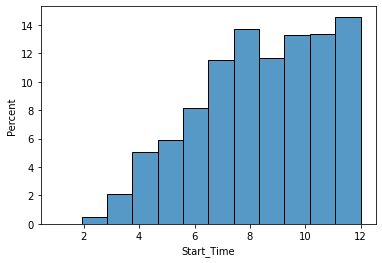

In [47]:
df_2016 = df[df['Year']==2016]
sns.histplot(df_2016['Start_Time'].dt.month, stat='percent', bins=12)

<AxesSubplot:xlabel='Start_Time', ylabel='Percent'>

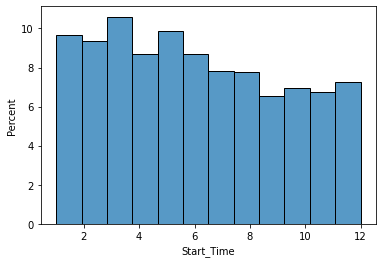

In [48]:
df_2017 = df[df['Year']==2017]
sns.histplot(df_2017['Start_Time'].dt.month, stat='percent', bins=12)

<AxesSubplot:xlabel='Start_Time', ylabel='Percent'>

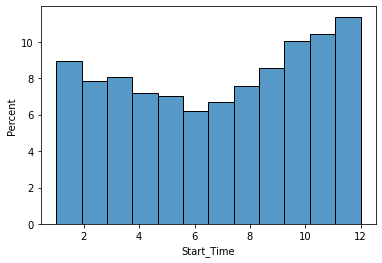

In [49]:
df_2018 = df[df['Year']==2018]
sns.histplot(df_2018['Start_Time'].dt.month, stat='percent', bins=12)

<AxesSubplot:xlabel='Start_Time', ylabel='Percent'>

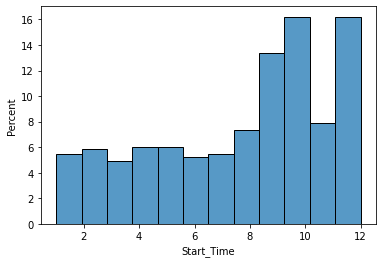

In [50]:
df_2019 = df[df['Year']==2019]
sns.histplot(df_2019['Start_Time'].dt.month, stat='percent', bins=12)

<AxesSubplot:xlabel='Start_Time', ylabel='Percent'>

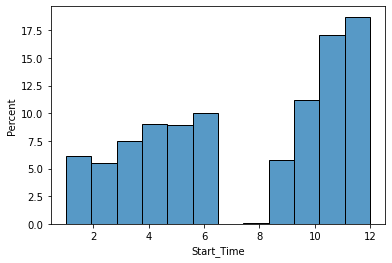

In [51]:
df_2020 = df[df['Year']==2020]
sns.histplot(df_2020['Start_Time'].dt.month, stat='percent', bins=12)

<AxesSubplot:xlabel='Start_Time', ylabel='Percent'>

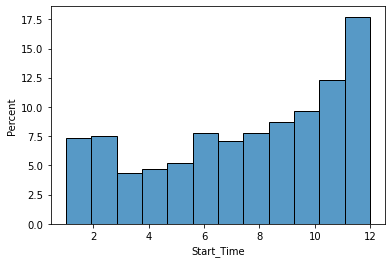

In [52]:
df_2021 = df[df['Year']==2021]
sns.histplot(df_2021['Start_Time'].dt.month, stat='percent', bins=12)

###### Getting the traffic volume trend data for US

In [53]:
df_volume=pd.read_excel('21dectvt.xlsx', 'SAVMT')
df_volume.head()

,Month,Date,VMT,Seasonally Adjusted VMT (2000 to present)
0,Jan,2000-01-01,203442,227329
1,Feb,2000-02-01,199261,228781
2,Mar,2000-03-01,232490,230218
3,Apr,2000-04-01,227698,229039
4,May,2000-05-01,242501,229684


In [54]:
df_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Month                                      264 non-null    object        
 1   Date                                       264 non-null    datetime64[ns]
 2   VMT                                        264 non-null    int64         
 3   Seasonally Adjusted VMT (2000 to present)  264 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 8.4+ KB


In [55]:
 df_volume['Year']=df_volume['Date'].dt.year

In [56]:
df_volume=df_volume[df_volume['Year']>=2016]

<AxesSubplot:xlabel='Year'>

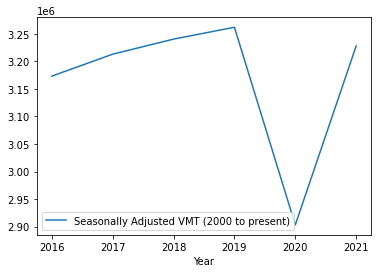

In [57]:
df_volume[['Year', 'Seasonally Adjusted VMT (2000 to present)']].groupby(by='Year').sum().plot(kind='line')

In [58]:
df['Hour']=df['Start_Time'].dt.hour
df['Hour'].unique()

array([ 0,  7,  8, 11, 14, 15, 16, 17, 20, 21,  5,  6,  9, 10, 12, 18, 22,
       13, 19, 23,  4,  3,  2,  1], dtype=int64)

<AxesSubplot:xlabel='Hour', ylabel='Percent'>

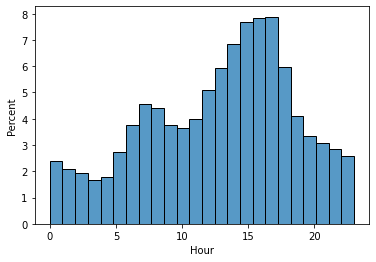

In [59]:
sns.histplot(df['Hour'], stat='percent', bins=24)

<AxesSubplot:xlabel='Start_Time', ylabel='Percent'>

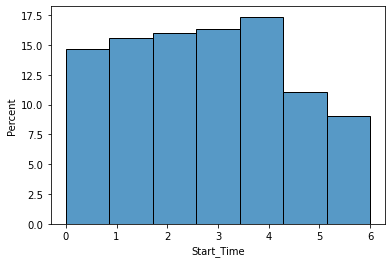

In [60]:
sns.histplot(df['Start_Time'].dt.dayofweek, stat='percent', bins=7)

###### Analysis by Severity and Other factors

In [61]:
df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Temperature', 'Year', 'Hour'],
      dtype='object')

In [65]:
df.dtypes

Severity                          int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance(mi)                    float64
Description                      object
Street                           object
Side                             object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp                object
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64
Wind_Direction                   object


<AxesSubplot:>

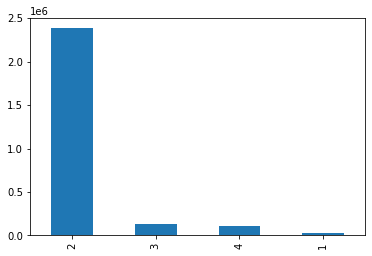

In [75]:
df['Severity'].value_counts().plot(kind='bar')

C:\Users\chitr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Severity', ylabel='count'>

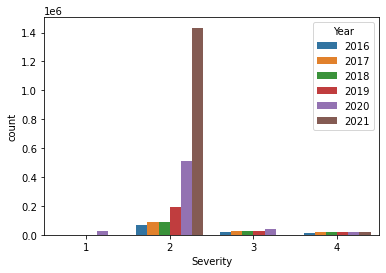

In [76]:
sns.countplot(df['Severity'], hue=df['Year'])

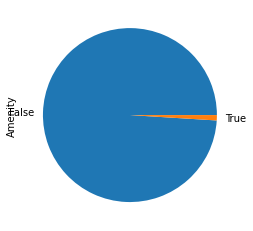

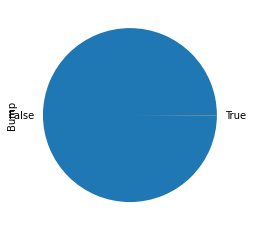

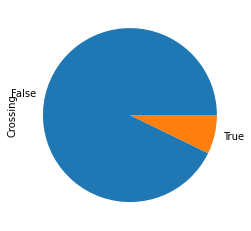

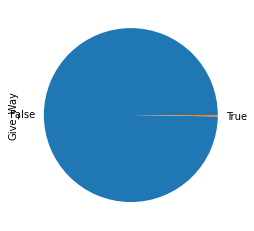

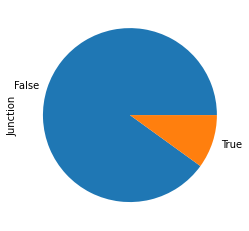

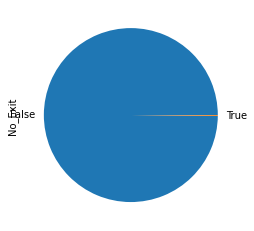

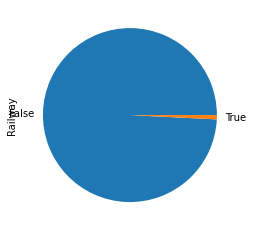

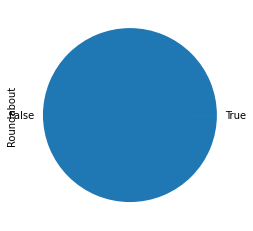

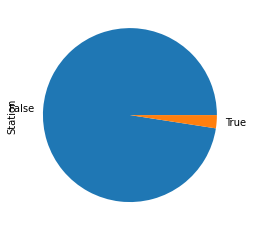

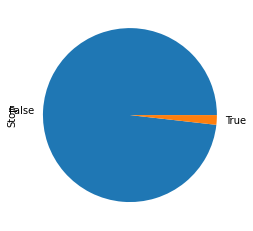

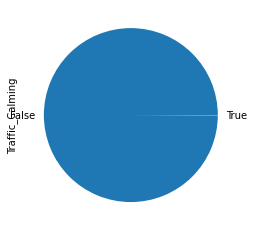

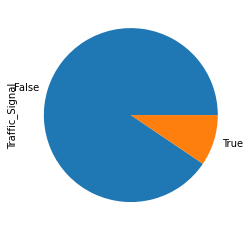

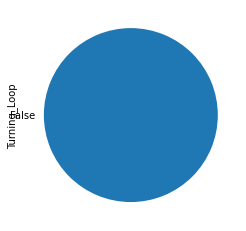

In [67]:
dff_bool = df.select_dtypes(include=bool)
for i in dff_bool.columns:
    plt.figure()
    df[i].value_counts().plot(kind='pie')

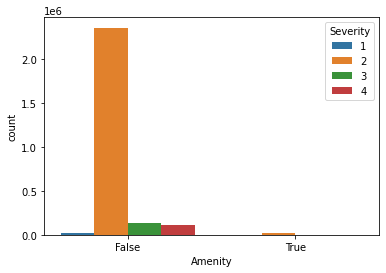

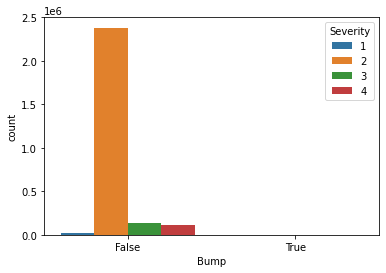

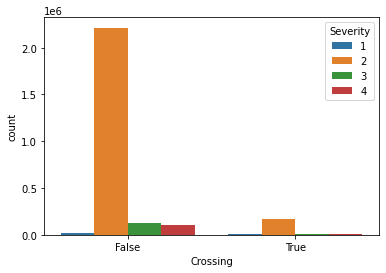

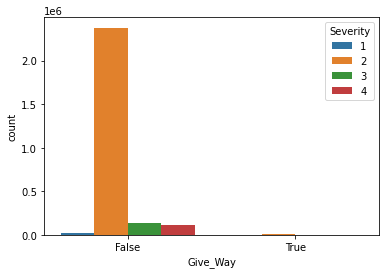

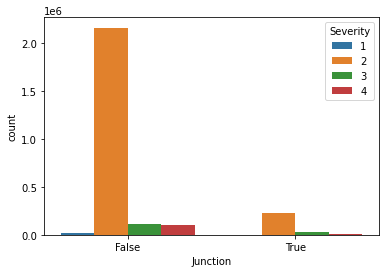

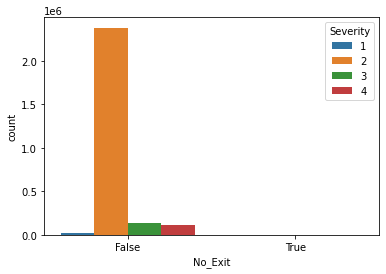

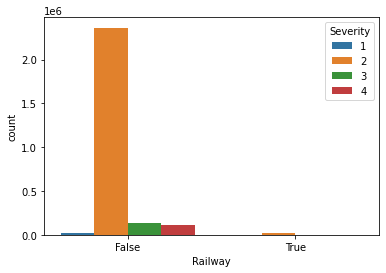

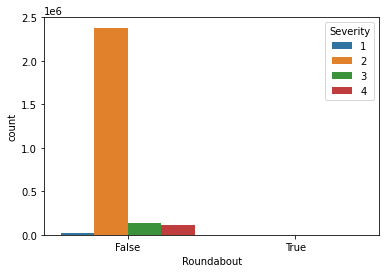

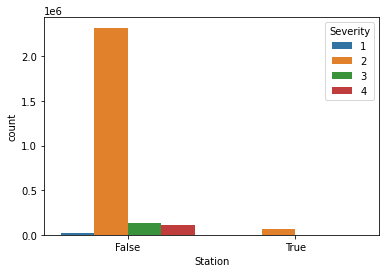

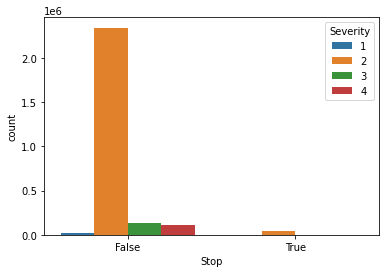

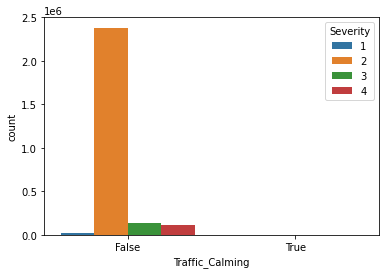

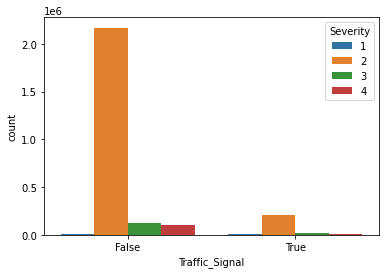

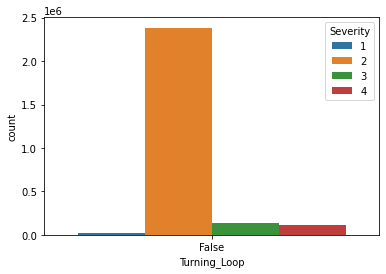

In [74]:
for i in dff_bool.columns:
    plt.figure()
    sns.countplot(x=i, data=df, hue='Severity')